# Multivariate Linear Regression

Consider a dataset with more potentially useful features which can be used for prediction as shown below,

| Size in feet $$x_1$$ | Number of bedrooms $$x_2$$ | Number of floors $$x_3$$ | Age of home in years $$x_4$$ | Price in 1000 USD $$y$$ |
|---|---|---|---|---|
|2104|5|1|45|460|
|1416|3|2|40|232|
|1534|3|2|30|315|
|852|2|1|36|178|
|$$\ldots$$|$$\ldots$$|$$\ldots$$|$$\ldots$$|$$\ldots$$|

This can now represent a multivariate linear regression problem, where $x\in\mathbb{R}^n$, for $n$ features where $n=4$ in this particular case. 

The $j$-th input feature, where $j\in[1,\ldots,n]$. for the $i$-th training example, where $i\in[1,\ldots,m]$, shall be denoted as $x_j^{(i)}$

The model for linear regression can now be expressed as,
$$
f(x^{(i)})=w_1x_1^{(i)}+w_2x_2^{(i)}+\dots+w_jx_j^{(i)}+b
$$
A more compact notation uses vectors to represent $w$ and $x^{(i)}$ such that
$$
w=\begin{bmatrix}w_1\\\vdots\\w_j\end{bmatrix}\quad x^{(i)}=\begin{bmatrix}x_1^{(i)}\\\vdots\\x_j^{(i)}\end{bmatrix}
$$
And the linear regression model can be rewritten as,
$$
f(x^{(i)})=w^\top x^{(i)}+b
$$

## Vectorized Implementation
An implementation which is much more computationally efficient can be achieved through *vectorization*, i.e, using the parallel processing capabilities of modern processors (CPU or GPU) to compute linear algebra calculations much faster than through loops.

Let $X\in\mathbb{R}^{n\times m}$ be defined as the *design matrix* contaning all values of $x_j^{(i)}$ for all $i\in[1,\ldots,m]$ and $j\in[1,\ldots,n]$, and let $Y$ be defined as a row vector containing all values of $y^{(i)}$
$$
    X=
    \begin{bmatrix}
        x^{(1)}_1 & \dots  & x^{(m)}_1 \\
        \vdots    & \ddots & \vdots    \\
        x^{(1)}_n & \dots  & x^{(m)}_n
    \end{bmatrix}
    \qquad
    Y=\begin{bmatrix}y^{(1)}& \dots &y^{(m)}\end{bmatrix}
$$

Given parameters $w\in\mathbb{R}^{n}$ and $b\in\mathbb{R}$, the vector containing all predicted values $\hat{Y}$ can be achieved with very little changes from the original equations,
$$
    \hat{Y}=w^\top X+b
$$

With that said, the variable $b$ does not necessarily need to be a separate variable. Including a *dummy* feature $x^{(i)}_{j+1}=1$ for all $i$, within the design matrix allows for an additional component to $w$ as follows,
$$
X=
    \begin{bmatrix}
        x^{(1)}_1 & \dots  & x^{(m)}_1 \\
        \vdots    & \ddots & \vdots    \\
        x^{(1)}_n & \dots  & x^{(m)}_n \\
        1 & \dots & 1
    \end{bmatrix}
    \qquad
    w=\begin{bmatrix}w_1\\\vdots\\w_n\\b\end{bmatrix}
$$

With this, the calculations for $\nabla_{W}J(W)$ remains equivalent (see gradient descent), and the equation for $\hat{Y}$ becomes
$$
    \hat{Y}=w^\top X
$$

## Gradient Descent
Given the cost function $J(w,b)$ which has been previously defined as the *mean squared error*,
$$
J(w,b)=\frac{1}{2m}\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)^2
$$
The gradient of the cost function w.r.t the weights $w$ is
$$
\nabla_{\vec{w}}J(w,b)=\begin{bmatrix}
    \frac{\partial J(w,b)}{\partial w_1}, & \dots &, \frac{\partial J(w,b)}{\partial w_j}
\end{bmatrix}^\top
$$

The components of this gradient (where $w_j=w$ in the univariate case and $j\in[1,\ldots,n]$ for the multivariate case) can be calculated as,
$$
\begin{align*}
    \frac{\partial J(w,b)}{\partial w_j}
    &=\frac{\partial}{\partial w_j}\left[\frac{1}{2m}\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)^2\right]\\
    &=\frac{1}{2m}\cdot\sum_{i=1}^{m}\left[\frac{\partial}{\partial w_j}\left(\hat{y}^{(i)}-y^{(i)}\right)^2\right]\\
    &=\frac{1}{2m}\cdot\sum_{i=1}^{m}\left[2\left(\hat{y}^{(i)}-y^{(i)}\right)\cdot\frac{\partial}{\partial w_j}\left(w^\top x^{(i)}+b-y^{(i)}\right)\right]\\
    &=\frac{1}{2m}\sum_{i=1}^{m}\left[2\left(\hat{y}^{(i)}-y^{(i)}\right)\cdot x^{(i)}_j\right]\\
    &=\frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})\cdot x^{(i)}_j
\end{align*}
$$

Likewise, $\frac{\partial J(w,b)}{b}$ can be calculated as 
$$
\frac{\partial J(w,b)}{\partial b}=\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)
$$

Given the design matrix $X$ and parameters $w$ (with $b$ included), a vectorized implementation of $\nabla_{w}J(w)$ can be calculated as follows:

The residuals $\hat{Y}-Y$ can be obtained simply by subtracting the two vectors. After which, the vector can be transposed leading to,
$$
    (\hat{Y}-Y)^\top=\begin{bmatrix}\hat{y}^{(1)}-y^{(1)}\\\vdots\\\hat{y}^{(m)}-y^{(m)}\end{bmatrix}
$$
Recall that the design matrix $X$ is defined as
$$
X=
    \begin{bmatrix}
        x^{(1)}_1 & \dots  & x^{(m)}_1 \\
        \vdots    & \ddots & \vdots    \\
        x^{(1)}_n & \dots  & x^{(m)}_n \\
        1 & \dots & 1
    \end{bmatrix}
    \qquad
$$
With this, the gradient $\nabla_{w}J(w)$ can simply be calculated as a matrix-vector product,
$$
    \nabla_{w}J(w)=\frac{X(\hat{Y}-Y)^\top}{m}
$$

## Implementation

In [51]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

Loading the **diabetes** dataset from sklearn

In [52]:
diabetes_X, diabetes_Y = datasets.load_diabetes(return_X_y = True)

In [53]:
diabetes_X.shape

(442, 10)

In [54]:
diabetes_Y.shape

(442,)

Transforming the datasets into the proper matrixes for $X$ and $Y$

In [55]:
diabetes_X = diabetes_X.T
diabetes_Y = diabetes_Y[:, np.newaxis].T

diabetes_X.shape, diabetes_Y.shape

((10, 442), (1, 442))

## Feature Scaling

To improve the performance of gradient descent, it helps to scale the features such that they are similar or comparable in terms of their ranges. There are multiple ways to perform these transformation: **z-score normalization**, or **mean normalization**

For *z-score normalization*, given the mean $\mu_j$ and standard deviation $\sigma_j$ for every feature $j\in[1,\ldots,n]$, the input feature $x^{(i)}_j$ for $i\in[1,\ldots,m]$ is transformed as
$$
x^{(i)}_j\leftarrow\frac{x^{(i)}_j-\mu_j}{\sigma_j}
$$
thus the resulting features now have $\mu_j=0$ and $\sigma_j=1$.

For *mean normalization*, given the mean $\mu_j$ and range $x_{j,max}-x_{j,min}$ for every feature $j\in[1,\ldots,n]$, the input feature $x^{(i)}_j$ for $i\in[1,\ldots,m]$ is transformed as
$$
x^{(i)}_j\leftarrow\frac{x^{(i)}_j-\mu_j}{x_{j,max}-x_{j,min}}
$$

In [56]:
diabetes_X = (diabetes_X - diabetes_X.mean(axis = 1, keepdims = True)) / diabetes_X.std(axis = 1, keepdims = True)

In [63]:
def calc_optimal_params_grad_descent(train_X, train_Y, num_epochs, learning_rate):
    # Additional column for the bias
    bias_row = np.full((1, train_X.shape[1]), 1)
    train_X  = np.row_stack([train_X, bias_row ])
    
    n, m = train_X.shape
    w    = np.random.randn(n, 1)
    
    loss_hist = np.zeros(num_epochs)
    
    for i in range(num_epochs):
        Y_pred = np.dot(w.T, train_X)
        J_cost = np.mean((Y_pred - train_Y) ** 2) / 2.0
        loss_hist[i] = J_cost
        
        # Calculate gradients
        grad_W = np.dot(train_X, (Y_pred - train_Y).T) / m
        
        # Update the weights
        w = w - (learning_rate * grad_W)
        
    return w, loss_hist

weights, loss_hist = calc_optimal_params_grad_descent(diabetes_X, diabetes_Y, 100, 0.25)

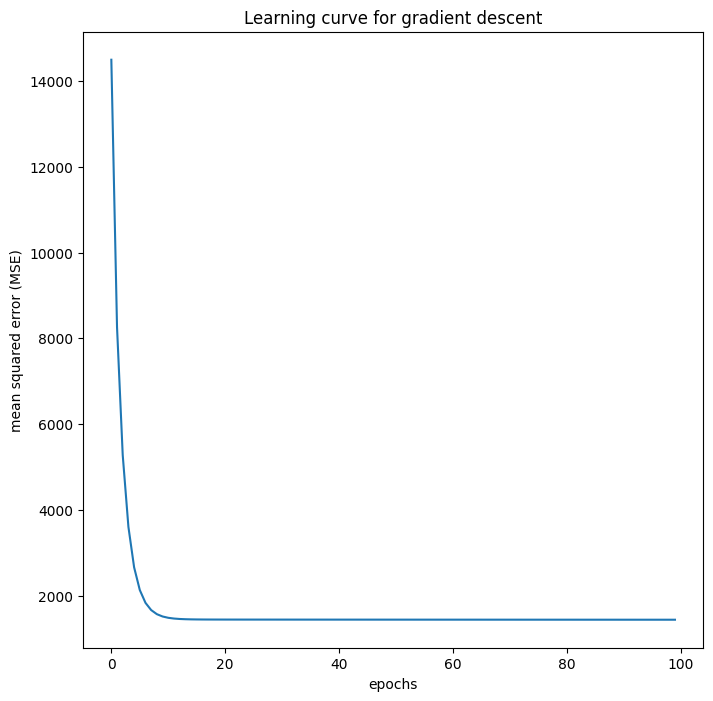

In [68]:
fig = plt.figure(figsize = (8, 8))
plt.title('Learning curve for gradient descent')
plt.xlabel('epochs')
plt.ylabel('mean squared error (MSE)')
plt.plot(loss_hist)
plt.show()

In [65]:
weights

array([[ -0.33471396],
       [-11.25506195],
       [ 25.09734561],
       [ 15.3112254 ],
       [ -8.01631928],
       [ -1.10084591],
       [ -8.17893129],
       [  5.10428143],
       [ 24.55651706],
       [  3.31657211],
       [152.13348416]])